# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [73]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

In [74]:
import matplotlib.pyplot as plt

### Now take a look at the shapes of the X and y matricies 

In [75]:
X.shape, y.shape

((70000, 784), (70000,))

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [76]:
X[3600]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  11.,  9

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

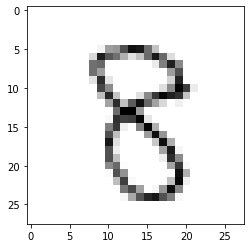

In [77]:
plt.imshow(X[3600].reshape(28, 28), cmap = plt.cm.binary, interpolation='nearest')

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [78]:
y[3600]

'8'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [79]:
X_train, X_test, y_train, y_test = X[:6000], X[6000:], y[:6000], y[6000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [80]:
y5 = np.where(y == '5', 1, 0)

In [81]:
y5_train, y5_test = y5[:6000], y5[6000:]

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
model = LogisticRegression()

In [84]:
model.fit(X_train, y5_train)

C:\Users\Mingiziem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
y5_pred = model.predict(X)

### Does the classifier predict correctly the 36000th digit we picked before?

In [86]:
y5_pred[3600]

0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [97]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [88]:
never_5_clf.fit(X_train, y5_train)

In [89]:
never5_pred = never_5_clf.predict(X_test)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [90]:
y5_pred = model.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [92]:
print ('Accuracy Score:', accuracy_score(y5_test, y5_pred))
print ('F1 score:', f1_score(y5_test, y5_pred))
print ('Recall Score:', recall_score(y5_test, y5_pred))
print ('Precision Score:', precision_score(y5_test, y5_pred))
print ('confussion matrix:',confusion_matrix(y5_test, y5_pred))

Accuracy Score: 0.95078125
F1 score: 0.7327790973871734
Recall Score: 0.7447835833764442
Precision Score: 0.7211554516613792
confussion matrix: [[56531  1670]
 [ 1480  4319]]


In [93]:
print ('Accuracy score:', accuracy_score(y5_test, never5_pred))
print ('F1 score:', f1_score(y5_test, never5_pred))
print ('Recall Score:', recall_score(y5_test, never5_pred))
print ('Precision Score:', precision_score(y5_test, never5_pred))
print ('confussion matrix:',confusion_matrix(y5_test, never5_pred))

Accuracy score: 0.909390625
F1 score: 0.0
Recall Score: 0.0
Precision Score: 0.0


C:\Users\Mingiziem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


confussion matrix: [[58201     0]
 [ 5799     0]]


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [106]:
from sklearn.metrics import roc_curve,plot_roc_curve,roc_auc_score,auc
plot_roc_curve(never_5_clf, X_train, y5_train)

ValueError: Never5Classifier should be a binary classifer

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

NameError: name 'roc_auc' is not defined

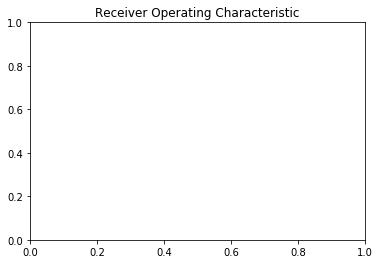

In [105]:
preds = model.predict(X_test)
fpr, tpr, threshold = roc_curve(y5_test, never5_pred)
 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Now find the roc_auc_score for each. 

### What does this metric tell you? Which classifier works better with this metric in mind?